In [62]:
import yt, json, glob
import numpy as np
import matplotlib.pyplot as plt
from analysis_helpers import *



In [63]:
sim = 'phx256-1'
logs = glob.glob('C:/Users/azton/Projects/phoenix_analysis/size_of-bak/%s/*.json'%sim)
with open(logs[0], 'r') as f:
    rq = json.load(f)
for i, log in enumerate(logs):
    if i != 0:
        with open(log, 'r') as f:
            newd = json.load(f)
        for k in newd:
            rq[k] = newd[k]
tlen = 0
tmax = 0
for k in rq:
    if len(rq[k]['time']) > tlen: tlen = len(rq[k]['time'])
    dt = max(rq[k]['time']) - min(rq[k]['time'])
    if dt > tmax: tmax = dt
print('Time Length: %d, Model_Time = %0.1f'%(tlen, tmax))
for k in rq:
    for kk in rq[k]:
        print(kk)
    break
dt = tmax / tlen

Time Length: 10, Model_Time = 50.0
region_start_time
time
p3_metallicity_radius
temperature_radius
p3_all_ctime
p3_all_position
p3_all_mass
p3_all_idx
snr_ctime
p3_bh_ctime
p3_live_masses
p3_live_ctime
p2_star_masses
p2_star_ctime
p3_bh_mass
snr_mass
radius


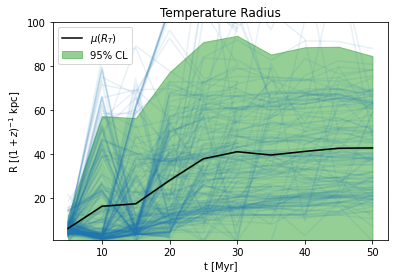

In [65]:
ltime = tlen # number of time slots expected
tmax += 1 # account for not including last time in np.arange
nskip = tmax // (ltime-1)
time = np.arange(0, tmax, nskip)
temp_profs = []
for k in rq:
    tk = rq[k]['temperature_radius']
    while len(tk) < ltime:
        tk.append(0)
    temp_profs.append(tk)

temp_profs = np.array(temp_profs)
meant = []
stdt = []
for p in range(ltime):
    bin = temp_profs[:,p]
    meant.append(bin[bin > 0].mean())
    stdt.append(bin[bin > 0].std())
meant = np.array(meant)
stdt = np.array(stdt)
fig, ax = plt.subplots()
for prof in temp_profs: #iterate particle indices that were logged
    ax.plot(time[1:][prof >0], prof[prof > 0], alpha=0.1, color='tab:blue')
#     ax.set_yscale('log')
    # ax.set_ylim(0.0, max(rq[k]['p3_metallicity_radius']))
ax.plot(time[1:], meant, alpha=1, color='k', label='$\mu (R_T)$')
ax.fill_between(time[1:], meant, meant+1.97*stdt, color='tab:green',alpha=0.5, label= '95% CL')
ax.fill_between(time[1:], meant, meant-1.97*stdt, color='tab:green',alpha=0.5)
ax.set_ylim(1,100)
ax.set_title('Temperature Radius')
ax.set_ylabel('R [$(1+z)^{-1}$ kpc]')
ax.set_xlabel('t [Myr]')
ax.legend()
plt.savefig('phx256-1_temp_rad.png')

<ipython-input-59-163a484e5c15>:14: RuntimeWarning: Mean of empty slice.
  meant.append(bin[bin > 0].mean())
C:\Users\azton\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\azton\Anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\azton\Anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\azton\Anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


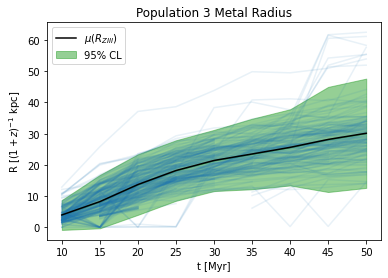

In [59]:
time = np.arange(0, tmax, nskip)
temp_profs = []
for k in rq:
    tk = rq[k]['p3_metallicity_radius']
    while len(tk) < ltime:
        tk.append(0)
    temp_profs.append(tk)

temp_profs = np.array(temp_profs)
meant = []
stdt = []
for p in range(ltime):
    bin = temp_profs[:,p]
    meant.append(bin[bin > 0].mean())
    stdt.append(bin[bin > 0].std())
meant = np.array(meant)
stdt = np.array(stdt)
fig, ax = plt.subplots()
for prof in temp_profs: #iterate particle indices that were logged
    ax.plot(time[1:][prof >0], prof[prof > 0], alpha=0.1, color='tab:blue')
# ax.set_yscale('log')
ax.plot(time[1:], meant, alpha=1, color='k', label='$\mu (R_{ZIII}$)')
ax.fill_between(time[1:], meant, meant+1.97*stdt, color='tab:green',alpha=0.5, label='95% CL')
ax.fill_between(time[1:], meant, meant-1.97*stdt, color='tab:green',alpha=0.5)
ax.set_title('Population 3 Metal Radius')
ax.set_xlabel('t [Myr]')
ax.set_ylabel('R [$(1+z)^{-1}$ kpc]')
ax.legend()
# ax.set_ylim(1, 125)
plt.savefig('phx256-1_p3z_radius.png')

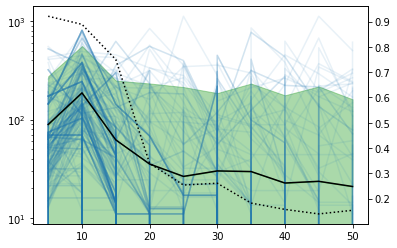

In [52]:
timebins = np.arange(0, tmax+1, dt)
allmass = []
fig, ax = plt.subplots()

for k in rq:# iterate p3 forming regions
    massbins = [0 for t in range(tlen)]
    for kk in ['p3_live_masses']:
        for i, t in enumerate(rq[k][kk]):
            if 'snr_mass' in kk:
                t = [m*1e20 for m in t]
            if 'p3_live_masses' in kk:
                t = [m if (m > 11 and m < 40) or (m > 140 and m < 260) else 0 for m in t]
            massbins[i]+= sum(t)
    ax.plot(time[1:], massbins, color='tab:blue',alpha=0.1)
    allmass.append(massbins)
meanall = np.array(allmass).mean(0)
stdall = np.array(allmass).std(0)
ax.plot(time[1:], np.array(allmass).mean(0), color='k', alpha=1)
ax.fill_between(time[1:], meanall, meanall+1.97*stdall, color='tab:green', alpha=0.4)
ax.fill_between(time[1:], meanall, meanall-1.97*stdall, color='tab:green', alpha=0.4)
# ax.set_ylim(1,2500)
ax.set_yscale('log')
ax2 = ax.twinx()
allmass = np.array(allmass)

fwstar = np.zeros(tlen)
for i,t in enumerate(time[1:]):
    fwstar[i] += sum(allmass[:,i] > 0) / float(len(allmass[:,i]))
ax2.plot(time[1:], fwstar, color='k', linestyle=':')
# ax2.set_yticks([0,1e-5,0.1,0.3,0.7, 1])


[ 0.          5.00008618 10.00017236 15.00025854 20.00034472 25.0004309
 30.00051708 35.00060326 40.00068944 45.00077562 50.0008618 ]


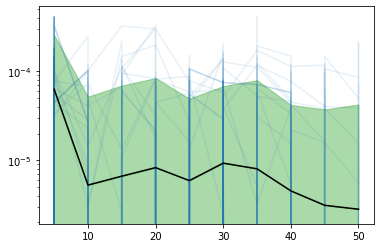

In [51]:
sfrs = []
fig, ax = plt.subplots()
timebins = np.arange(0, tmax+1, dt)
print(timebins)

for j, k in enumerate(rq):
    mass_time = np.zeros_like(timebins)
    all_mass = np.array(rq[k]['p3_all_mass'][-1])
    all_ctime = np.array(rq[k]['p3_all_ctime'][-1])
    all_ctime = all_ctime - first_time
    first_time = min(rq[k]['time'])
    last_time = max(rq[k]['time'])
    dtotal = last_time - first_time
    all_mass[all_mass < 1e-5] *= 1e20

    if dtotal < 4: continue
    
    cbinned = np.digitize(all_ctime, timebins, right=False)
    for i, bin in enumerate(cbinned):
        if bin >= timebins.size:
            continue
        mass_time[bin] += all_mass[i]
    mt = np.cumsum(mass_time)
    dmdt = [(mt[i] - mt[i-1]) / (dt*1e6) for i in range(1, len(mt))]
    while len(dmdt) < tlen:
        dmdt.append(0)
    sfrs.append(dmdt)
    ax.plot(timebins[1:], dmdt, alpha=0.1, color='tab:blue')
sfrs = np.array(sfrs)

meansfrs = np.average(sfrs, axis=0)
sfrstd = np.std(sfrs, axis=0)
ax.plot(timebins[1:], meansfrs, alpha=1, color='k')
ax.fill_between(timebins[1:], meansfrs, meansfrs+1.97*sfrstd, color='tab:green',alpha=0.4)
ax.fill_between(timebins[1:], meansfrs, meansfrs-1.97*sfrstd, color='tab:green',alpha=0.4)
ax.set_yscale('log')

In [47]:
# regression fit to determine the SN radius in metal and temp --
#  input is counts 
# {>SN, SN, HN, 40>M>100, 100 > M > 140, 140 < PISN < 200, 200 < PISN < 260, >260} and time to model (Myr)
massbins = [1, 11, 20, 40, 100, 140, 200, 260, 300]
timebins = np.arange(1, 30 + 1, 15)
idx = -1
mass_tok = None
time_tok = None
for i, k in enumerate(rq.keys()): # iterate over pidx's
    tnow = rq[k]['time'][idx]
    if i==0:
        times = [tnow - t for t in rq[k]['p3_all_ctime'][idx]]
        masses = [m*1e20 if m < 1e-5 else m for m in rq[k]['p3_all_mass'][idx]] 
        mass_tok, edges = np.histogram(masses, bins=massbins)
        time_tok, edges = np.histogram(times, bins=timebins)
    else:
        masses = [m*1e20 if m < 1e-5 else m for m in rq[k]['p3_all_mass'][idx]]          
        times = [tnow - t for t in rq[k]['p3_all_ctime'][idx]]
        m_tok, edges = np.histogram(masses, bins=massbins)
        t_tok, edges = np.histogram(times, bins=timebins)
        mass_tok = np.append(mass_tok, m_tok, axis=1)
        time_tok = np.append(time_tok, t_tok, axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [6]:
dt


0.0

In [9]:
m_tok

array([0, 6, 6, 1, 1, 1, 0, 1], dtype=int64)

In [14]:
np.vstack([mass_tok, m_tok])

array([[6, 9, 9, 6, 2, 1, 1, 1],
       [0, 6, 6, 1, 1, 1, 0, 1]], dtype=int64)